<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Gaussian mixture models
© ExploreAI Academy

In this train, we'll learn about soft or fuzzy clustering techniques, how the Gaussian mixture model works, and how to perform GMM clustering using sklearn.

## Learning objectives

By the end of this train, you should be able to:
- Learn how to fit a generative model to some data.
- Learn how to use Gaussian mixture models (GMMs) to cluster data.
- Understand the Expectation Maximisation algorithm.
- Implement GMMs in sklearn.

## Outline
This train is structured as follows:

- Soft/fuzzy clustering techniques.
- How Gaussian mixture models work.
- Gaussian mixture model clustering in sklearn.

## Soft/fuzzy clustering techniques

In this train, we introduce an example of a **soft clustering** technique. Recall that soft clustering techniques are techniques where data points can belong to multiple clusters to varying degrees. Unlike hard clustering techniques, soft clustering techniques are better suited for cases where clusters overlap with each other. This is because soft clustering techniques keep all possibilities of cluster assignment. Let's see if we can explain this point better by using an example. Remember this dress?

<img src="https://github.com/Explore-AI/Pictures/blob/master/black-and-blue-dress.jpg?raw=true" alt="Types of Clustering" style="width: 40%;"/>


[This dress](https://www.dictionary.com/e/s/trippy-favorite-viral-optical-illusions-explained/#the-dress-black-and-blue-or-white-and-gold) sparked an internet-wide debate because some people perceived it as black and blue, and some perceived it as white and gold. A hard clustering algorithm like K-means would have to pick a side in this debate. However, a soft clustering algorithm would pick both sides. In this case, if 39% of the people in this debate classified the dress as black and blue while 61% classified it as white and gold, then a soft-clustering algorithm would classify the dress as **39% black and blue, and 61% white and gold**. Another way to explain this clustering paradigm is by explaining the cluster membership of any given data point using a categorical distribution over all cluster labels. If we are forced to make a decision on that data point, then we sample a cluster label from our categorical distribution and use that as the correct answer. In this case, if we are asked about the dress lots of times, 61% of the time, we'll say it's white and gold, and 39% of the time, we'll say it's black and blue. 

_**Side Note:** To find out what the actual colour of the dress is [click here](https://youtu.be/dQw4w9WgXcQ?t=43)._

In the following section, we discuss Gaussian Mixture Models (GMMs) - a popular choice of soft/fuzzy clustering algorithm. 

## Gaussian mixture models

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-gmm.png" alt="GMM" style="width: 80%;"/>


A GMM is, as the name implies, a mixture of Gaussian distributions where we attempt to fit a Gaussian distribution to each cluster. Another way to state this is that we approximate the data using a weighted sum of _K_ Gaussian/Normal distributions, i.e.:

$$
\large P(\pi,\mu,\Sigma\mid X) = \sum \limits_{k=1}^{K} P(k) P(X \mid \mu_k,\Sigma_k)
$$
$$
\text{where} \large \quad 
 P(X|\mu_k,\Sigma_k) = \frac{1}{\sqrt{2\pi|\Sigma_k|}}exp\left[ -0.5(\mu_k-X)^T\Sigma^{-1}(\mu_k-X) \right]$$
 
and $P(k)$ are the mixing coefficients, i.e., the soft cluster assignments.


The assumption we make here is that each of our K clusters is spherical or elliptical in shape and can be characterised by a mean $\mu_k$ (or mean vector in higher dimensions) and a variance $\sigma^2_k$ (or covariance in higher dimensions). However, the parameters (i.e. the mean and variance) of each Gaussian distribution are unknown. As such, the objective of the Gaussian mixture modelling process is to approximate these parameters as closely as possible. 

### Fitting a Gaussian distribution - 1D example
Before we go on to discuss how the Expectation Maximisation (EM) algorithm (i.e., the algorithm for training GMMs) works, we need to first talk about what it means to fit a Gaussian distribution to some data. Fitting a Gaussian distribution to a dataset means that we assume that the data was generated in a Gaussian way, i.e., the data is normally distributed and was generated using some **mean** and some **variance**. Of course, this assumption is not always true, but it is a relatively safe assumption to make since a lot of processes in the real world are Gaussian-distributed. Suppose that we had the following 1-dimensional data:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# 1D data with N = 100 samples
X = np.array([ 0.4690433 ,  1.77247772, -0.79937833,  2.08347278,  0.96008571,
                0.84984587,  2.53514641, -1.77954757, -0.2197194 , -0.24392515,
               -1.45156281,  0.05793749,  1.22118967,  0.69298749, -1.95318449,
                0.46780091,  1.48841197,  0.03489486, -0.71973614,  0.78253223,
               -1.10623475, -1.39394697,  1.43624876,  0.0722706 ,  1.62888107,
               -0.61214466, -2.86427397, -1.01435684,  0.18012821, -0.43215255,
                1.40345509,  0.40500954, -0.1878166 ,  1.39892911, -0.30331199,
               -1.24989628,  0.05717373,  0.20798511, -0.75087319, -0.96573914,
               -0.83499918,  0.95337156, -0.03423916, -0.2720539 ,  0.852107  ,
                0.36567677,  1.56131278,  0.50956683, -0.20242891, -0.50132433,
               -0.39382268, -0.99104849, -1.11567828, -0.21453752,  0.49848449,
               -1.09310205, -0.09755406,  0.77719942, -1.18284674, -0.02979667,
               -0.54815865,  1.2200912 , -0.51472699,  0.83554114, -1.62354525,
               -1.03256075,  0.800314  , -0.41924884, -0.77253838, -0.32138824,
                1.22731845, -0.30567561,  0.19722008, -0.46858797,  0.56092996,
               -1.66687179,  0.50654635,  1.68834199, -0.12608541,  1.88398685,
               -1.02705767, -1.0139658 ,  0.94250101, -0.2120914 , -0.32842348,
                0.15071674,  0.21345239, -0.23936087, -1.35388172, -0.60518554,
                0.61064511,  0.11129081,  1.18438721,  0.51317973, -2.59507755,
               -1.08846815, -2.10072134,  0.10113415, -0.75070778,  0.45416333])

As you may have guessed, the next step is to estimate the sample mean $\hat{\mu}$ and variance $\hat{\sigma}^2$ using:

$$
\large \hat{\mu} = \frac{1}{N}\sum \limits_{i=1}^{N} x_i \qquad \text{ and } \qquad \hat{\sigma}^2 = \frac{1}{N-1}\sum \limits_{i=1}^{N} (\hat{\mu}-x_i)^{2} 
$$

In [3]:
# Luckily for us, the above formulae are already implemented in numpy as mean() and variance()
mean = np.mean(X)
variance = np.var(X,ddof=1)
print("mean = ",mean, "\nvariance = ",variance)

mean =  -0.05200175000000003 
variance =  1.086265726774446


And that's it; we've fitted a Gaussian distribution to our data! In other words, we made a **hypothesis** that our data is Gaussian/normally distributed. Then, we computed the parameters of the Gaussian distribution that we assume **generated** our data. As such, we can use these parameters to create a **generative model** that will give us data points that follow the same distribution as our original data. As you can see, there are plenty of ways to interpret or explain what we just did. 

Next, we would like to see how our hypothesis compares against our data. To do this, we'll build a hypothesis function to evaluate our parameters. Remember, our hypothesis is a Gaussian distribution, which is given by the following equation. 

$$
\large h(x,\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left[-\frac{(\mu-x)^2}{2\sigma^2}\right]
$$

In [4]:
# create hypothesis function
def hypothesis(x,mean,var):
    C = 1/np.sqrt(2*np.pi*var)
    return C*np.exp(-((mean-x)**2)/(2*var))

Finally, let's compare our hypothesis with how the data is truly distributed, i.e., by looking at its histogram: 

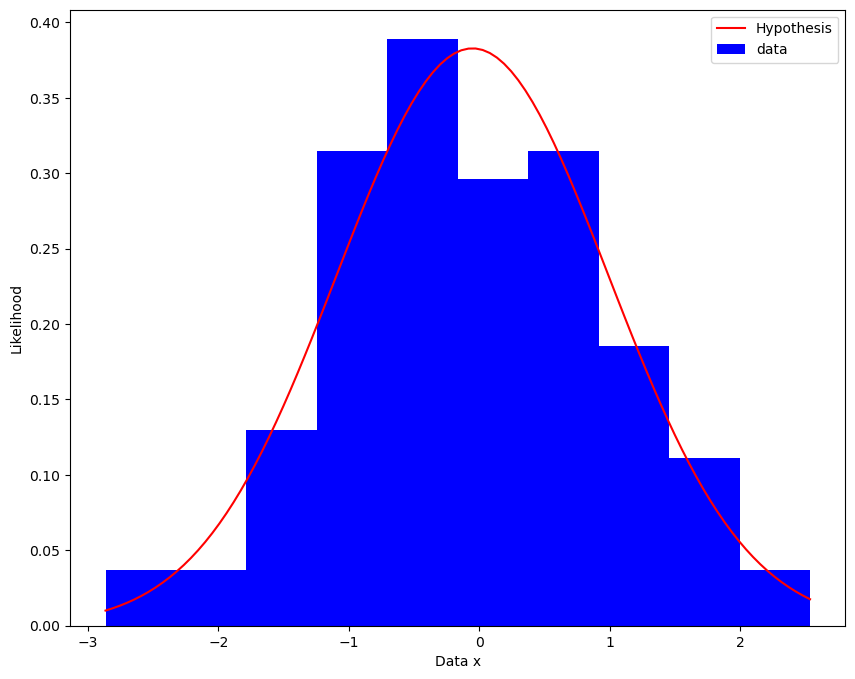

In [5]:
plt.figure(figsize=(10,8))

# evaluate hypothesis at every point between smallest and largest x
domain = np.linspace(np.min(X),np.max(X),num=100)
hyp = hypothesis(domain,mean,variance)
plt.plot(domain,hyp,'red',label='Hypothesis')

# plot histogram of data   
plt.hist(X,density=True,color='blue',label='data')
plt.legend()
plt.xlabel('Data x')
plt.ylabel('Likelihood')
plt.show()

As you can see, our hypothesis is pretty close to the underlying distribution. A conclusion we can make from this is that this data can be reasonably approximated with a Gaussian distribution of:

- `mean = -0.052`
- `variance = 1.086`

To cement this point, let's do one more example of fitting a Gaussian distribution to some data. 

### Fitting a Gaussian distribution - 2D example
As in the previous example, let's assume we are given the following data:

In [6]:
X = np.array([[ 1.18405449, -0.61883635],[ 0.82303412,  2.34545237],[ 0.42673046,  0.48581614],[-2.23450477,  0.2532654 ],[-2.23450477,  0.2532654 ],
            [-2.23450477,  0.2532654 ], [-0.28640509,  0.21023263], [ 0.63967181,  0.85205666], [ 0.42823605,  0.95335968], [ 0.3970288 , -0.11228348],
            [-2.09185064,  0.52349849], [ 0.336873  ,  0.07290918], [-0.17059836,  0.08075803], [-0.59336044,  1.04711674], [-0.0424399 , -0.59228045],
            [ 1.22920971, -0.11090265], [ 1.8747326 , -0.70050876], [-0.0494112 ,  0.43354407], [-0.8762429 ,  0.30484824], [ 0.78497093,  0.30996722],
            [ 0.45326148, -1.67663979], [-0.83121756,  0.84094015], [ 0.52141093, -0.16207117], [-0.52108727,  0.06136304], [ 0.72282484, -1.0194738 ],
            [ 0.2657052 , -0.23948218], [-1.74456399, -0.43014042], [ 0.91864104, -1.12071598], [ 1.57170977, -0.74164349], [-0.41335287,  0.95045059],
            [ 0.64302235,  0.02411848], [-1.76686324,  1.15590427], [ 0.71301054,  0.56447212], [ 0.60803609, -0.46964791], [-2.05930665, -0.8287741 ], 
            [-0.12545787,  1.49615772], [ 1.64737054,  1.39309602], [ 0.61428088,  1.83653766], [ 0.35183602,  1.21764892], [ 0.69285859, -0.26966068], 
            [-0.82625094, -0.11233266], [ 0.22153869, -0.22230833], [ 1.48555395, -2.26605394], [-1.1842873 , -0.6015293 ], [-0.42801843, -1.85755166], 
            [-0.6266858 , -0.10940033], [-0.85912054, -1.45635312], [-0.50489495,  2.68371611], [ 0.37835896, -0.9543046 ], [ 0.25337114, -1.90642799], 
            [ 0.9070055 ,  2.21987351], [ 0.2416872 , -0.46277313], [ 1.3096389 ,  1.38041353], [-0.77880778,  1.44810663], [ 0.01946108,  1.34767778], 
            [-1.10334462, -0.3236939 ], [-0.10999428, -0.6620466 ], [-0.27887276,  1.64339159], [-1.59708175,  0.17844474], [-0.15366357,  0.47804623], 
            [-0.08232383,  1.47403718], [-1.37151635, -0.24102183], [-0.15888604,  0.58106303], [ 0.08347985,  2.10064311], [ 0.68151704,  0.1532785 ], 
            [ 1.30449518,  1.00066168], [-2.00121055,  0.66646458], [-1.19761629, -0.98489152], [ 0.58517698,  1.94988805], [-0.72059476, -1.40765373], 
            [ 0.76408769,  1.91394767], [-1.82452629, -1.48230873], [ 0.73812697,  1.46300466], [ 0.50905436, -1.06867973], [ 1.27993371, -1.23583931], 
            [-0.08579759,  1.16789507], [-0.62528843, -0.12227063], [-0.85997776,  0.34879629], [-0.18332512,  0.93899945], [-1.08683726,  1.18691834], 
            [ 0.33477969, -0.78255199], [-0.81856565, -2.2604502 ], [-0.11159687, -0.78372415], [-0.26750993, -0.90687657], [-0.07519719,  0.31169849], 
            [-0.55479307, -0.84408206], [ 2.16397526,  1.86725312], [ 1.00039999, -0.57044739], [-1.12102751, -0.31039134], [-0.29435841, -0.04115669], 
            [ 1.36460232,  2.49310119], [ 0.24690957,  1.48624123], [-1.61849178, -0.69307334], [ 0.18234863,  1.02038581], [-0.6665022 ,  1.34464121], 
            [ 0.4542274 , -0.79833642], [-0.77347234,  0.58513183], [-0.72188959, -0.8124402 ], [ 1.73213478,  0.2254615 ]])



In this case, our data is 2-dimensional. However, the process of fitting a Gaussian here is still the same (more or less). The only difference here is that our parameters are more general, i.e., the mean vector $\bar{\mu}$ (this contains a mean for each dimension we have) and covariance matrix $\Sigma$ (In this case, we'll be using a diagonal covariance matrix, which contains a variance for each dimension along the diagonal, and 0's elsewhere). Our new parameters are given by the following:

$$
\large \hat{\bar{\mu}} = \frac{1}{N}\sum \limits_{i=1}^{N} \bar{x}_i \qquad \text{ and } \qquad \hat{\Sigma} = \frac{1}{N-1}\sum \limits_{i=1}^{N} (\hat{\bar{\mu}}-\bar{x}_i)(\hat{\bar{\mu}}-\bar{x}_i)^T 
$$

Again, notice that the only change that we've introduced is that our Gaussian distribution parameters are now in multiple dimensions. As such, standard multiplication has been replaced by matrix multiplication.

Next, let's calculate the mean vector and covariance matrix.

In [7]:
# Luckily for us, the above formulae are already implemented in numpy
mean_vector = np.mean(X,axis=0)
covariance = np.cov(X.T,ddof=1)
print("mean vector :\n",mean_vector, "\n\ncovariance :\n",covariance)

mean vector :
 [-0.07936995  0.18389085] 

covariance :
 [[1.01539884 0.13251138]
 [0.13251138 1.21247087]]


Now, we need to define our hypothesis function. In this case, we use a multivariate Gaussian distribution:


$$
\large h(X,\mu,\Sigma) = \frac{1}{\sqrt{2\pi|\Sigma|}}exp\left[ -0.5(\mu-X)^T\Sigma^{-1}(\mu-X) \right]
$$


In [8]:
# create hypothesis function (in this case, we'll use numpy)
def hypothesis(X, mu, cov):
    result = []
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    for x in X.T:        
        part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
        result.append(part1 * np.exp(part2))
    return np.array(result)

In [9]:
# generate points arranged in a grid for evaluating the hypothesis
num = 100
xx,yy = np.meshgrid(np.linspace(-5,5,num),np.linspace(-5,5,num))
domain = np.vstack((xx.ravel(),yy.ravel())).T

In [10]:
# evaluate hypothesis at every point in the grid
hyp = hypothesis(domain.T,mean_vector,covariance)
im = hyp.reshape((num,num)) 

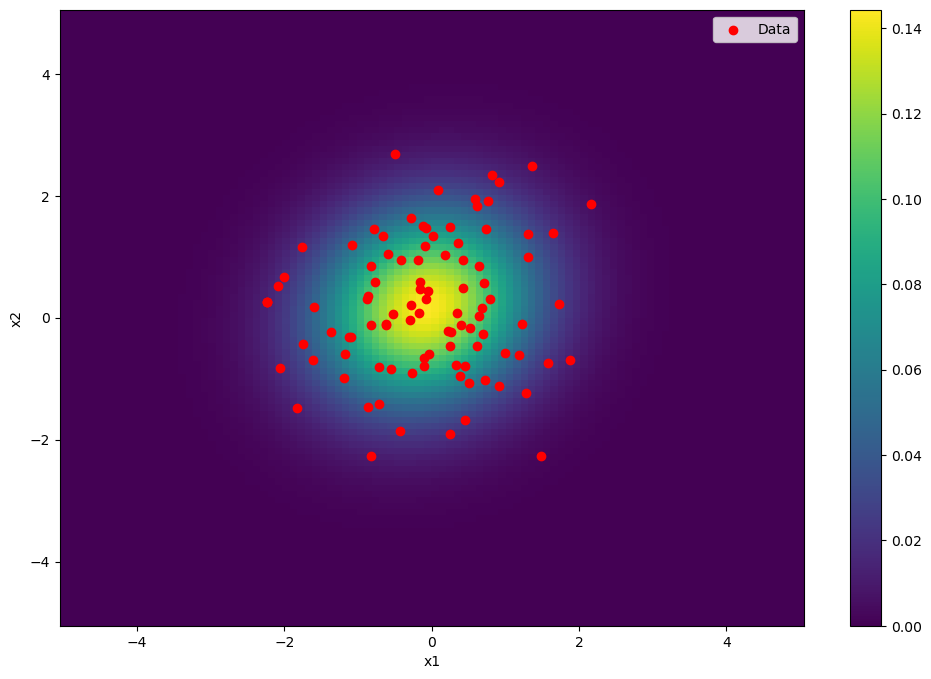

In [11]:
# visualise the hypothesis as a heatmap and compare against the data
plt.figure(figsize=(12,8))
plt.pcolor(xx,yy,im)
plt.colorbar()
plt.scatter(X[:,0],X[:,1],label='Data',c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

As you can see, our data can be well approximated using a Gaussian distribution hypothesis function. At this point, we have successfully fitted a **univariate Gaussian distribution** (for 1D data) and a  **multivariate Gaussian distribution** (for greater than or equal to 2-dimensional data) to some data. The Gaussian mixture model follows the same process and iteratively fits K Gaussian distributions to some data. Let's discuss how it works.

### The expectation maximisation algorithm
Now that we have a better idea of what it means to fit a univariate/multivariate Normal distribution to some data. Let's discuss the EM algorithm.  
#### Step 1: Choose the number of clusters
Choose K.
#### Step 2: Randomly initialise all Gaussians
For each k, choose a random mean (mean vector in higher dimensions) and random variance (covariance matrix in higher dimensions).
#### Step 3: Compute the likelihood
Next, we need to answer the question, "How likely (or how probable) is each data point under each of the k Gaussians?" For data point $x_i$ and Gaussian $k$ this **likelihood** is a number computed using:


$$
\large P(x_i|\mu_k,\Sigma_k) = \frac{1}{\sqrt{2\pi|\Sigma_k|}}exp\left[ -0.5(\mu_k-x_i)^T\Sigma^{-1}(\mu_k-x_i) \right]
$$

 _Look familiar? Indeed, this is the hypothesis function we used in the previous section. It is still the hypothesis here, but the likelihood is a more formal way to refer to it in this context. Also note that in this case, the arguments of the function are now separated by a '|'. This is because the likelihood is a conditional probability distribution, i.e.,"Given that we are on a Gaussian model **parameterised** by $\mu_k$ and $\Sigma_k$, what is the probability of observing $x_i$?"_. 

#### Step 4: Compute the posterior by using Bayes' rule on the likelihood
So far, we have likelihood values which tell us the likelihood of each data point $x_i$ belonging to each Gaussian model $\mu_k$ and $\Sigma_k$. However, it would be more useful for our model to tell us, "How likely is each Gaussian model $\mu_k$ and $\Sigma_k$ for each data point $x_i$." This question (i.e., the posterior) is more useful since we can tell to what degree a given data point $x_i$ belongs to each Gaussian model $\mu_k$ and $\Sigma_k$. 

According to Bayes' rule, we can compute the **posterior** by multiplying our **likelihood** with a **prior** and then **normalising**. The prior is simply our initial belief of what the cluster assignments should be for any data point. Since we don't know these assignments initially, it is reasonable to assume that each data point belongs to each cluster $\mu_k$ and $\Sigma_k$ with equal probability $\frac{1}{K}$. As such, our prior is given by:
$$
P(k) = \frac{1}{K}
$$

Now that we have a prior, we can multiply it with the likelihood and normalise to obtain the posterior:

$$ \large
P(\mu_k,\Sigma_k \mid x_i) = \frac{P(x_i|\mu_k,\Sigma_k)P(k)}{\sum \limits_{k=1}^{K} P(x_i|\mu_k,\Sigma_k)P(k)}
$$


To normalise, we have divided by $P(x_i)$, which is obtained by **marginalising** over all values of $k$.

#### Step 5: Use posterior to update the soft cluster assignments $P(k)$
In this step, we try to find out how significant a data point $x_i$ is to a Gaussian model $\mu_k$ and $\Sigma_k$. We achieve this using:

$$ \large
P(K) = \frac{\sum \limits_{i=1}^{N} P(\mu_k,\Sigma_k \mid x_i)}{\sum \limits_{k=1}^{K} \sum \limits_{i=1}^{N} P(\mu_k,\Sigma_k \mid x_i)}
$$

#### Step 6: Update the parameters of each Gaussian model
Here we update the mean vector $\mu_k$ and covariance matrix $\Sigma_k$ by weighting them by the posterior distribution, i.e.:

$$
\large \mu_k = \frac{\sum \limits_{i=1}^{N} P(\mu_k,\Sigma_k \mid x_i) x_i }{N\sum \limits_{i=1}^{N} P(\mu_k,\Sigma_k \mid x_i)}\qquad \text{and } \qquad \Sigma_k = \frac{\sum \limits_{i=1}^{N} P(\mu_k,\Sigma_k \mid x_i)(\mu-x_i)(\mu-x_i)^T}{(N-1)\sum \limits_{i=1}^{N} P(\mu_k,\Sigma_k \mid x_i)} 
$$





In the algorithm above, steps 3 and 4 are known as the expectation step and steps 5 and 6 are known as the maximisation steps. 

In a way, the EM algorithm works in a similar way to the K-means algorithm. Instead of centroids, we use Gaussian model parameters, which we iteratively evaluate and then update them until there is no further improvement. Ideally, we end up with a single Gaussian distribution per cluster, as shown below:

<img src="https://www.bayesserver.com/Visualizations/Images/ClusterModelAnimation.png?raw=true" alt="Types of Clustering" style="width: 80%;"/>

## Gaussian mixture model clustering in sklearn

We will use the same generated data as we used for K-means and agglomerative clustering. 

### Setting up the data

In [12]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Feature 2')

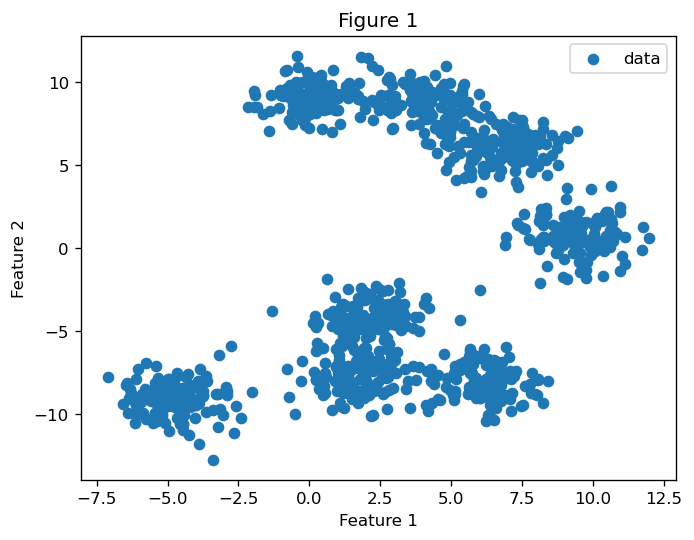

In [13]:
# make 8 blobs in 2D space
n_features = 2
centers = 8

X, y = make_blobs(n_samples=1000, centers=centers, n_features=n_features, random_state=68) #rand = 8, 42

df = pd.DataFrame(X, columns=[*[f'feature_{i}' for i in range(n_features)]])

# plot data
plt.figure(dpi=120)
x1 = df['feature_0']
x2 = df['feature_1']
plt.scatter(x1, x2, label="data")

plt.legend()
plt.title("Figure 1")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Preprocessing the data

Let's standardise our data to get all predictive variables onto similar numerical scales.

In [14]:
# create scaler object
scaler = StandardScaler()

# scale the data
X_scaled = scaler.fit_transform(df)

### Implement Gaussian mixture model clustering algorithm

To implement GMM clustering in sklearn, we have to do the following:

1. Import the `GaussianMixture` class;
2. Create an instance of the `GaussianMixture` class, specifying the number of clusters;
3. Use the `fit()` method to find the probability of each data point belonging to each cluster; and
4. Use the `predict()` method to predict the most likely cluster into which each data point falls.

In [15]:
from sklearn.mixture import GaussianMixture

The methods we covered on how to pick $K$ for K-means clustering also apply here. Let's pick $K = 8$ here as per our analysis in the K-means clustering train.

In [16]:
# pick K
K = 8

In [17]:
# Create the GMM instance
GMM = GaussianMixture(n_components=K, random_state=23)

# Use the object to fit the algorithm
GMM.fit(X_scaled)

# Predict in which cluster each data point falls
GMM_pred = GMM.predict(X_scaled)

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [18]:
df['cluster_label'] = GMM_pred

Text(0, 0.5, 'Feature 2')

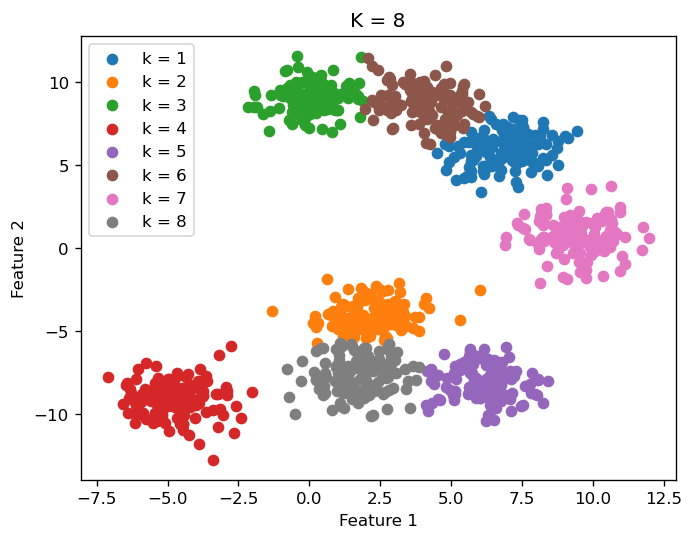

In [19]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label'] == k]['feature_0']
    x2 = df[df['cluster_label'] == k]['feature_1']
    plt.scatter(x1, x2, label="k = "+str(k+1))
    
plt.legend()
plt.title("K = 8")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Cluster probabilities

We can also see what probabilities are assigned to each data point and subsequently either make our predictions manually or only keep a subset of the data points (those with high probabilities of belonging to a certain cluster).

We extract the probabilities by using the `predict_proba()` method:

In [20]:
GMM.predict_proba(X_scaled)

array([[7.87678272e-069, 1.02976362e-015, 1.02767951e-096, ...,
        9.93535174e-111, 1.17366450e-062, 1.41629384e-012],
       [6.05935373e-030, 8.31518511e-001, 7.38659357e-063, ...,
        7.66812090e-049, 4.05542762e-018, 1.68467844e-001],
       [2.93939020e-006, 1.27716672e-049, 1.08642898e-003, ...,
        9.98910632e-001, 2.14455181e-020, 1.44542645e-055],
       ...,
       [4.63016474e-001, 9.32184176e-031, 1.31468505e-008, ...,
        5.36983513e-001, 4.05184493e-010, 1.37286882e-039],
       [1.13307524e-011, 2.71091997e-012, 2.57058570e-053, ...,
        9.81306474e-019, 1.00000000e+000, 8.64066680e-023],
       [1.78300877e-003, 3.08563122e-033, 4.33005964e-003, ...,
        9.93886932e-001, 3.50342751e-015, 2.15393574e-040]])

As you can see, these probabilities are the soft cluster assignments, i.e., each data point has a probability value of belonging to each of the eight clusters.

## Advantages and disadvantages of Gaussian mixture model clustering

**Advantages**

* Provides probability estimates rather than hard assignments;
* Clusters can be of any ellipsoidal shape, not just circular ones.

**Disadvantages**

* The number of clusters K needs to be specified before;
* Requires assumption of Gaussian (Normal) distributions across dimensions.

## Conclusion

In this train, we introduced soft/fuzzy clustering algorithms and briefly explained how Gaussian Mixture Models, an example of a soft clustering algorithm, work. We then showed how to implement a Gaussian Mixture Model in sklearn as well as how to visualise multi-dimensional data. 

## Additional links
- [EM Algorithm - how it works](https://www.youtube.com/watch?v=REypj2sy_5U)

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>